In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import cmath
import math
import scipy.stats as stats
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt

# Apresentação 


### Olá! Meu nome é Rafael Andreolli Prochnow e sou formado em Ciências do Esporte pela Unicamp 

# Passo a Passo do MCDA 



## Instância Decisória
-> Decisor: Pessoa que tem o poder de decisão na empresa\
-> O Analista: Realiza as análises para o decisor\
-> Agente 1...K: Pessoas presentes na empresa que tem o conhecimento específico das áreas analisadas\

## Modelagem do Problema 
* Definição do Objetivo
* Definição dos Criérios e subcritérios:
> $C = \{C_{1}, C_{2}, ..., C_{k}\}$
* Definição das Alternativas
> $A = \{A_{1}, A_{2}, ..., A_{n}\}$


## Método MCDA
* Atribuição de valor relativo ou estrutura de comprarção entre critérios: Pesos
> $w = \{w_{1}, w_{2}, ..., w_{k}\}$, tal que, $\sum_{j=1}^{k} w_{j}= 1$ o conjunto de pesos dos critérios
* Avaliação das alternativas em relação aos critérios: (Obtenção da matriz de decisão)
> $ \begin{bmatrix} d_{11} & \cdots & d_{1k} \\ \vdots & \ddots & \vdots \\ d_{n1} & \cdots & d_{nk} \end{bmatrix} $
a matriz de decisão, onde $d_{ij}$ representa a avaliação da alternativa $A_{i}$ em relação ao critério $C_{j}$
* Normalização da matriz de decisão
* Escolha e aplicação de um método de agregação 
* Análise de sensibilidade 


# Princípios Desejáveis em MCDA
* Deve servir de apoio para o decisor e não ter a pretensão de substituí-lo 
* Identificar os valores e julgamentos e propiciar uma ofrma analítica e organizada de se chegar a ulgum consenso.
* Deve complementar e desafiar a intuição do deciso,  sem querer substituir sua experiência intuitiva.
* Deve estimular a tomada de boas decisões além de fornecer uma maneira sistemátia de apresentá-las e defendê-las.

# Racional Compensatório ou Não-Compensatório
*As informações e imagem foram retiradas do slides do professor na matérias PO 460- Métodos de Apoio à Decisão Multicritério 


In [2]:
#<br>
#<img src="imagem1.png">

# Atividade 1

In [3]:
# Pesos dos critérios 
w = [0.18, 0.20, 0.10, 0.20, 0.12, 0.05, 0.15]

# Matriz de decisão  
d = {'Alternativas': ['Fornecedor A', 'Fornecedor B', 'Fornecedor C', 'Fornecedor D'],
     'Preço (R$)': [1.20, 1.65, 1.27, 1.77],
     'Prazo de Entrega (Dias)': [25, 40, 20, 25], 
     'Habilidade Técnica': [8, 7, 9, 7], 
     'Capacidade Produtiva': [58000, 31000, 45000, 50000], 
     'Confiabilidade': [7, 7, 9, 8], 
     'Pós-Venda': [5, 8, 6, 8],
     'Localização (KM)': [1126, 334, 227, 550]   
    }

df = pd.DataFrame(data=d)
df

,Alternativas,Preço (R$),Prazo de Entrega (Dias),Habilidade Técnica,Capacidade Produtiva,Confiabilidade,Pós-Venda,Localização (KM)
0,Fornecedor A,1.20,25,8,58000,7,5,1126
1,Fornecedor B,1.65,40,7,31000,7,8,334
2,Fornecedor C,1.27,20,9,45000,9,6,227
3,Fornecedor D,1.77,25,7,50000,8,8,550


In [4]:
df.columns

Index(['Alternativas', 'Preço (R$)', 'Prazo de Entrega (Dias)',
       'Habilidade Técnica', 'Capacidade Produtiva', 'Confiabilidade',
       'Pós-Venda', 'Localização (KM)'],
      dtype='object')

In [5]:
ordenar = []
for i in list(df.columns)[1:]:
    if (i == 'Preço (R$)') | (i == 'Prazo de Entrega (Dias)') | (i == 'Localização (KM)'):
        ordenar.append(list(df.sort_values([i])['Alternativas']))
    else:
        ordenar.append(list(df.sort_values([i], ascending=False)['Alternativas']))
final = pd.DataFrame(data=ordenar, columns=['1°', '2°', '3°', '4°'], index=list(df.columns)[1:])
final

,1°,2°,3°,4°
Preço (R$),Fornecedor A,Fornecedor C,Fornecedor B,Fornecedor D
Prazo de Entrega (Dias),Fornecedor C,Fornecedor A,Fornecedor D,Fornecedor B
Habilidade Técnica,Fornecedor C,Fornecedor A,Fornecedor B,Fornecedor D
Capacidade Produtiva,Fornecedor A,Fornecedor D,Fornecedor C,Fornecedor B
Confiabilidade,Fornecedor C,Fornecedor D,Fornecedor A,Fornecedor B
Pós-Venda,Fornecedor B,Fornecedor D,Fornecedor C,Fornecedor A
Localização (KM),Fornecedor C,Fornecedor B,Fornecedor D,Fornecedor A


In [6]:
comparacao = pd.DataFrame({'Alternativa': ['Fornecedor A', 'Fornecedor B', 'Fornecedor C', 'Fornecedor D']})
for j in ['1°', '2°', '3°', '4°']:
    b = pd.DataFrame(dict(final.groupby([j]).size()), index=[0]).T
    b.reset_index(inplace=True)
    b.rename(columns={0:j, 'index': 'Alternativa'}, inplace=True)
    comparacao = comparacao.merge(b, how='outer', on='Alternativa')
comparacao.fillna(0, inplace=True)
comparacao = round(comparacao[['1°', '2°', '3°', '4°']]/7, 2)
comparacao['Alternativa'] = ['Fornecedor A', 'Fornecedor B', 'Fornecedor C', 'Fornecedor D']
comparacao = comparacao[['Alternativa','1°', '2°', '3°', '4°']]

In [7]:
comparacao

,Alternativa,1°,2°,3°,4°
0,Fornecedor A,0.29,0.29,0.14,0.29
1,Fornecedor B,0.14,0.14,0.29,0.43
2,Fornecedor C,0.57,0.14,0.29,0.00
3,Fornecedor D,0.00,0.43,0.29,0.29


Utilizado esse método para o ordenamento dos Fornecedores sem nenhuma aplicação de métodos MCDA a ordem escolhida foi Fornecedor C > Fornecedor A > Fornecedor D > Fornecedor B.

O Fornecedor A,primeiro colocado no ordenamento, ficou 0,57 dos critérios em 1° lugar e 0,14 em 2° lugar, e apresentou boa colocação para critérios mais importante. O Fornecedor A ficou na segunda colocação do ordenamento, além de apresentar 0,29 dos critérios em 1° lugar e 0,29 em 2° lugar o fator que determinou sua classificação no ordenamento foi o peso dos critérios, desse modo deixando o Fornecedor D em terceira colocação no ordenamento. Já o Fornecedor B foi na quarta posição do ordenamento devido a pior colcação dos critérios com 0.43 e menos relevância com os critérios com mais pesos.

#  MAVT: Multi-Atribute Value Theory


## Hipóteses em MAVT:
* Oproblema envolve um conjunto finito de alternativas que são avaliadas de forma **determinística** em relação à um conjunto finito de critérios

* Há um caráter compensatório entre os critérios


## Propriedades dos critérios

### i) Compreensíveis
> As consequências de cada escolha são fáceis de serem compreendidas pelo decisor.

### ii) Mensuráveis:
> Associamos um valor a cada critério

### iii) Completude
> São suficientes para representar o problema 

### iv) Tamanho Mínimo
> Muitos critérios podem confundir o decisor 

### v) Não-Redundantes(Estatisticamente indepedentes)
> Evitar "somar duas vezes" a mesma consequência


## Normalização de matriz de decisão 

Antes de proceder a agregação das alternativas, a matriz de decisão (𝐷) deve ser normalizada, de modo a obter-se
uma matriz (𝑋), cujas entradas estejam no intervalo [0,1] e representem as respectivas contribuições marginais de
valor relativa a cada avaliação.

A normalização geralmente é feita com base em numa escala de máximo e mínimo, mas pode admitir qualquer função
de valor que mapeie o intervalo de avaliação das alternativas no intervalo [0,1].

O processo de normalização também é utilizado para se fazer o ajuste de direção dos critérios
* Nos critérios de maximização (max), ou de benefício, quanto maior a avaliação mais perto de 1 deve ser a valor
marginal.

* Nos critérios de minimização (min), ou de custo, quanto maior a avaliação mais perto de 0 deve ser a valor
marginal.


# Tipos de Normalização 

## Normalização pelo Máximo

> $x_{ij} = \frac{d_{ij}}{\underset{i}{max(d_{ij})}}$, se o critério é MAX

> $x_{ij} = \frac{\underset{i}{max(d_{ij})}}{d_{ij}}$, se o critério é MIN

## Exemplo

In [8]:
# Tabela apresentada 
d = {'Alternativas': ['Fundo de Investimento Imobiliário', 'Bitcoin', 'Ações', 'Tesouro (Selic)', 'Fundo de Investimento'],
     'Valorização (%a.a.)': [10, 50, 20, 5, 15],
     'Risco': [2, 5, 4, 1, 3], 
     'Dividendos(%a.a)': [8, 0, 5, 0, 0], 
     'Liquidez (D+)': [2, 0, 2, 0, 5], 
    }
# Critério MAX e MIN
crit_max = [True, False, True, False]
# Pesos: w
w = [0.20, 0.25, 0.40, 0.15]
df = pd.DataFrame(data=d)
df

,Alternativas,Valorização (%a.a.),Risco,Dividendos(%a.a),Liquidez (D+)
0,Fundo de Investimento Imobiliário,10,2,8,2
1,Bitcoin,50,5,0,0
2,Ações,20,4,5,2
3,Tesouro (Selic),5,1,0,0
4,Fundo de Investimento,15,3,0,5


In [9]:
def norm_max(frame, crit):
    # Matriz de decisão 
    decisao = np.array(frame[frame.columns[1:]]).T
    
    X = [] 
    # Percorre em i e vendo se o Critério é max ou min
    for i, m in zip(decisao, crit_max):
        # Armazenar o valores obtidos
        c = []
        # Encontrar valor de max e min
        minimo = min(i)
        maximo = max(i)
        if m: # Se o critério for max
            for j in i:
                c.append(j/maximo)
        else: # Se o critério for min
            if minimo == 0: # Se o valor mínimo for igual a 0
                for j in i:
                    c.append(1-(j/maximo))
            else: # Se o valor mínimo for diferente a 0
                for j in i:
                    c.append(minimo/j)
        X.append(c)
    X = np.transpose(X)
    return X

In [10]:
X = norm_max(frame=df, crit=crit_max)
X

array([[0.2       , 0.5       , 1.        , 0.6       ],
       [1.        , 0.2       , 0.        , 1.        ],
       [0.4       , 0.25      , 0.625     , 0.6       ],
       [0.1       , 1.        , 0.        , 1.        ],
       [0.3       , 0.33333333, 0.        , 0.        ]])


## Normalização 0-1

> $x_{ij} = \frac{\underset{i}{d_{ij}} - min(d_{ij})}
{\underset{i}{max(d_{ij})} - \underset{i}{min(d_{ij})}}$, se o critério é MAX


> $x_{ij} = \frac{\underset{i}{max(d_{ij})} - d_{ij}}
{\underset{i}{max(d_{ij})} - \underset{i}{min(d_{ij})}}$, se o critério é MIN

## Exemplo

In [11]:
def norm_binario(frame, crit):
    # Matriz de decisão 
    decisao = np.array(frame[frame.columns[1:]]).T
    
    X = []
    for i, m in zip(decisao, crit):
        # Armazenar o valores obtidos
        c = []
        # Encontrar valor de max e min
        minimo = min(i)
        maximo = max(i)
        if m: # Se o critério for max
            for j in i:
                c.append((j-minimo)/(maximo-minimo))
        else:  # Se o critério for Min
            for j in i:
                c.append((maximo-j)/(maximo-minimo))
        X.append(c)
    X = np.transpose(X)
    return X

In [12]:
X = norm_binario(frame=df, crit=crit_max)
X

array([[0.11111111, 0.75      , 1.        , 0.6       ],
       [1.        , 0.        , 0.        , 1.        ],
       [0.33333333, 0.25      , 0.625     , 0.6       ],
       [0.        , 1.        , 0.        , 1.        ],
       [0.22222222, 0.5       , 0.        , 0.        ]])


## Normalização pela Soma

> $ x_{ij} = \frac{d_{ij}}{\sum_{i}d_{ij}}$, se o critério é MAX

> $ x_{ij} = 1 - \frac{d_{ij}}{\sum_{i}d_{ij}}$, se o critério é MIN

## Exemplo

In [13]:
def norm_soma(frame, crit):
    # Matriz de decisão 
    decisao = np.array(frame[frame.columns[1:]]).T
    
    X = [] 
    for i, m in zip(decisao, crit):
        # Armazenar o valores obtidos
        c = []
        # Encontrar valor de max e min
        soma = sum(i)
        if m: # Se o critério for max
            for j in i:
                c.append(j/soma)
        else:  # Se o critério for Min
            for j in i:
                c.append(1-(j/soma))
        X.append(c)
    X = np.transpose(X)
    return X

In [14]:
X = norm_soma(frame=df, crit=crit_max)
X

array([[0.1       , 0.86666667, 0.61538462, 0.77777778],
       [0.5       , 0.66666667, 0.        , 1.        ],
       [0.2       , 0.73333333, 0.38461538, 0.77777778],
       [0.05      , 0.93333333, 0.        , 1.        ],
       [0.15      , 0.8       , 0.        , 0.44444444]])


## Normalização Euclidiana

> $ x_{ij} = \frac{d_{ij}}{\sqrt{\sum_{i=i}^n(d_{ij})^2}}$, se o critério é MAX

> $ x_{ij} = 1 - \frac{d_{ij}}{\sqrt{\sum_{i=i}^n(d_{ij})^2}}$, se o critério é MIN

## Exemplo

In [15]:
def norm_euclidiana(frame, crit):
    # Matriz de decisão 
    decisao = np.array(frame[frame.columns[1:]]).T
    
    X = [] 
    a = 0
    for i, m in zip(decisao, crit):
        # Armazenar o valores obtidos
        c = []
        # Encontrar valor de max e min
        raiz = (sum(i*i)**(1/2))
        if m: # Se o critério for max
            for j in i:
                c.append(j/raiz)
        else:  # Se o critério for Min
            for j in i:
                c.append(1-(j/raiz))
        X.append(c)
    X = np.transpose(X)
    return X

In [16]:
X = norm_euclidiana(frame=df, crit=crit_max)
X

array([[0.1754116 , 0.73032006, 0.8479983 , 0.65184469],
       [0.87705802, 0.32580014, 0.        , 1.        ],
       [0.35082321, 0.46064011, 0.52999894, 0.65184469],
       [0.0877058 , 0.86516003, 0.        , 1.        ],
       [0.26311741, 0.59548008, 0.        , 0.12961172]])

# Processo de Adaptação do pesos 


## Elicitação

* Abordagem subjetiva, que depende de informações fornecidas pelo decisor.

* Métodos:

> Elicitação direta
* O decisor indica um número para cada critério (entre 0 e 1, por exemplo), o qual indica a importância de cada critério.
* Esses valores são normalizados (dividido pela soma) para encontrar os pesos

> SMART
* O decisor ordena os critérios do mais importante para o menos importante. O último (o menos importante) recebe o valor 10.
* Em seguida, o decisor indica um valor, maior que 10, para o segundo critério menos importante.
* O procedimento continua até atribuirmos valores a todos os critérios, sempre maior que o anterior. Por fim, normalizamos os pesos.

## Adaptação baseada nos dados
- Abordagem objetiva, que depende (apenas) da matriz de decisão.
- Método:

> Desvio padrão
* A ideia é atribuir pesos maiores para critérios que “carreguem mais informação”, a qual é medida, aqui, pelo desvio padrão (𝜎𝑗):

> CRITIC
* A ideia é atribuir pesos maiores para critérios que “carreguem mais informação” e atenuar o efeito da redundância entre critérios.

# Saw:  Simple Additive Weighting – Média ponderada


- Um dos mais simples e largamente utilizados métodos de agregação.
- Agregação linear aditiva

## Passo 1:
Calcula-se o valor $v_i$ de cada alternativa $A_i$:
$$v_i = \sum_{j=1}^{k}x_{ij}w_{j}= 1$$

## Passo 2:
Ordena-se as alternativas de acordo com a ordenação crescente do vetor $v = [v_1, v_2 ..., v_n]$.

In [17]:
def saw(crit, peso, frame, norm=True):
    # Verificar se o código já foi utilizado
    primeira_col = frame.columns[0]
    for i in frame.columns:
        if i == 'Ordenamento_saw':
            frame.drop(columns=['Ordenamento_saw'], inplace=True)
        if i == 'Ordenamento_topsis':
            frame.drop(columns=['Ordenamento_topsis'], inplace=True)
        else:
            pass
    if norm:
        # Matriz de Decisão: X
        X = norm_binario(frame=frame, crit=crit)
    else:
        X = np.array(frame[frame.columns[1:]])

    v = []
    # Passo 1
    for k in X:
        v.append(round(sum(k*peso), 2))
    
    # Passo 2:
    frame['Ordenamento_saw'] = v
    final = list(frame.sort_values(by='Ordenamento_saw', ascending=False)[primeira_col])
    ordem = 1
    for x in final:
        print(f'{ordem}°', x)
        ordem += 1
    return frame

In [18]:
df = saw(crit=crit_max, peso=w, frame=df)
df

1° Fundo de Investimento Imobiliário
2° Ações
3° Tesouro (Selic)
4° Bitcoin
5° Fundo de Investimento


,Alternativas,Valorização (%a.a.),Risco,Dividendos(%a.a),Liquidez (D+),Ordenamento_saw
0,Fundo de Investimento Imobiliário,10,2,8,2,0.70
1,Bitcoin,50,5,0,0,0.35
2,Ações,20,4,5,2,0.47
3,Tesouro (Selic),5,1,0,0,0.40
4,Fundo de Investimento,15,3,0,5,0.17


# TOPSIS: Technique for Order of Preference by Similarity to Ideal Solution

In [19]:
def topsis(crit, peso, frame):
    # Verificar se o código já foi utilizado
    primeira_col = frame.columns[0]
    for i in frame.columns: 
        if i == 'Ordenamento_saw':
            frame.drop(columns=['Ordenamento_saw'], inplace=True)
        if i == 'Ordenamento_topsis':
            frame.drop(columns=['Ordenamento_topsis'], inplace=True)
        else:
            pass
    
    # Passo 1: Calcular a matriz de decisão normalizada (normalização Euclidiana) 
    X = norm_euclidiana(frame=frame, crit=crit)
    
    # Passo 2: Calcular a matriz normalizada ponderada pelos pesos w
    v = []
    for i in X:
        v.append(i*peso)
    v = np.array(v)
    v = np.transpose(v)
    
    # Passo 3: Definir uma alternativa ideal positiva A+ e uma alternativa negativa A-
    A_positivo = []
    A_negativo = []
    for j in v:
        A_positivo.append(max(j))
        A_negativo.append(min(j))
    v = np.transpose(v)
    
    # Passo 4: Calcular as distâncias d+ e d- de ad alternativa para as as alternativas ideias 
    d_positivo = []
    d_negativo = []
    for jj in v:
        d_positivo.append(distance.euclidean(jj, A_positivo))
        d_negativo.append(distance.euclidean(jj, A_negativo))
    
    # Passo 5: O valor de cada alternativa é dado por r
    r = []
    for ii in range(len(d_negativo)):
        r.append(d_negativo[ii]/(d_negativo[ii]+ d_positivo[ii]))
    
    # Passo 6 Odenar as alternativas de acordo com os índeces da ordenação crescente do valor r
    frame['Ordenamento_topsis'] = r
    final = list(frame.sort_values(by='Ordenamento_topsis', ascending=False)[primeira_col])
    ordem = 1
    for x in final:
        print(f'{ordem}° Lugar -->', x)
        ordem += 1
    return frame

In [20]:
df = topsis(crit=crit_max, peso=w, frame=df)
df

1° Lugar --> Fundo de Investimento Imobiliário
2° Lugar --> Ações
3° Lugar --> Bitcoin
4° Lugar --> Tesouro (Selic)
5° Lugar --> Fundo de Investimento


,Alternativas,Valorização (%a.a.),Risco,Dividendos(%a.a),Liquidez (D+),Ordenamento_topsis
0,Fundo de Investimento Imobiliário,10,2,8,2,0.702802
1,Bitcoin,50,5,0,0,0.359483
2,Ações,20,4,5,2,0.539036
3,Tesouro (Selic),5,1,0,0,0.334069
4,Fundo de Investimento,15,3,0,5,0.163262


# Atividade 2

## Parte 1


### (i) Escolha dois méodos de normalização,sendo um deles a Euclidiana, e normalize os dados;

In [25]:
# Tabela apresentada 
d = {'Alternativas': ['Fundo de Investimento Imobiliário', 'Bitcoin', 'Ações', 'Tesouro (Selic)', 'Fundo de Investimento'],
     'Valorização (%a.a.)': [10, 50, 20, 5, 15],
     'Risco': [2, 5, 4, 1, 3], 
     'Dividendos(%a.a)': [8, 0, 5, 0, 0], 
     'Liquidez (D+)': [2, 0, 2, 0, 5], 
    }
# Critério
crit_max = [True, False, True, False]
df = pd.DataFrame(data=d)
# Pesos: w
w = [0.20, 0.25, 0.40, 0.15]

In [26]:
# Matriz de Decisão: X
X = norm_binario(frame=df, crit=crit_max)
X

array([[0.11111111, 0.75      , 1.        , 0.6       ],
       [1.        , 0.        , 0.        , 1.        ],
       [0.33333333, 0.25      , 0.625     , 0.6       ],
       [0.        , 1.        , 0.        , 1.        ],
       [0.22222222, 0.5       , 0.        , 0.        ]])

In [27]:
X = norm_euclidiana(frame=df, crit=crit_max)
X

array([[0.1754116 , 0.73032006, 0.8479983 , 0.65184469],
       [0.87705802, 0.32580014, 0.        , 1.        ],
       [0.35082321, 0.46064011, 0.52999894, 0.65184469],
       [0.0877058 , 0.86516003, 0.        , 1.        ],
       [0.26311741, 0.59548008, 0.        , 0.12961172]])


### (ii) Aplique os métodos SAW eTOPSIS em ambas as matrizes de decisão normalizadas;

In [28]:
# Método SAW
df = saw(crit=crit_max, peso=w, frame=df)
df

1° Fundo de Investimento Imobiliário
2° Ações
3° Tesouro (Selic)
4° Bitcoin
5° Fundo de Investimento


,Alternativas,Valorização (%a.a.),Risco,Dividendos(%a.a),Liquidez (D+),Ordenamento_saw
0,Fundo de Investimento Imobiliário,10,2,8,2,0.70
1,Bitcoin,50,5,0,0,0.35
2,Ações,20,4,5,2,0.47
3,Tesouro (Selic),5,1,0,0,0.40
4,Fundo de Investimento,15,3,0,5,0.17


In [29]:
# Método TOPSIS
df = topsis(crit=crit_max, peso=w, frame=df)
df

1° Lugar --> Fundo de Investimento Imobiliário
2° Lugar --> Ações
3° Lugar --> Bitcoin
4° Lugar --> Tesouro (Selic)
5° Lugar --> Fundo de Investimento


,Alternativas,Valorização (%a.a.),Risco,Dividendos(%a.a),Liquidez (D+),Ordenamento_topsis
0,Fundo de Investimento Imobiliário,10,2,8,2,0.702802
1,Bitcoin,50,5,0,0,0.359483
2,Ações,20,4,5,2,0.539036
3,Tesouro (Selic),5,1,0,0,0.334069
4,Fundo de Investimento,15,3,0,5,0.163262


## Parte 2


### Contrução de um hospital 

- Tempo médio que o paciente espera na emergência (𝐶1)

- Número de pacientes que podem ser acomodados nas UTIs (𝐶2)

- Distância entre a localização do hospital e o centro urbano mais próximo (𝐶3)

In [30]:
# Tabela apresentada 
d = {'Alternativas': ['Hospital 1', 'Hospital 2', 'Hospital 3', 'Hospital 4'],
     'Tempo de Espera': [8, 8, 4, 4],
     'Pacientes Acomodados': [7, 4, 7, 4], 
     'Distância': [4, 7, 4, 7],
    }
# Critério
crit_max = [False, True, True]
df = pd.DataFrame(data=d)

In [31]:
df

,Alternativas,Tempo de Espera,Pacientes Acomodados,Distância
0,Hospital 1,8,7,4
1,Hospital 2,8,4,7
2,Hospital 3,4,7,4
3,Hospital 4,4,4,7


hospital 4 e hospital 3: 4w1 + 4w2 + 7w3 > 4w1 + 7w2 + 4w3 => 

-3w2 > -3w3 => w3 > w2

hospital 1 e hospital 2: 8w1 + 7w2 + 4w3 > 8w1 + 4w2 + 7w3 =>

3w2 > 3w3 => w2 > w3

No primeiro caso, o decisor quando diz 'prefere melhor localização ao invés do número de pacientes acomodados' podemos dizer que w3 > w2 e quanodo analisamos a sua segunda preferencia, 'abre mão da locallização e prefere um hospital que pode acomodar mais pacientes' ele ser  refere w2 > 3. Dessa forma, há inconsistência na preferencia do decisor.

* (ii) Considere os pesos 𝑤 = [0,39 0,31 0,30]. Aplique o método TOPSIS (com normalização Euclidiana) e ordene os hospitais.

In [32]:
# Pesos: w
w = [0.39, 0.31, 0.30]
# Método TOPSIS
df = topsis(crit=crit_max, peso=w, frame=df)
df

1° Lugar --> Hospital 3
2° Lugar --> Hospital 4
3° Lugar --> Hospital 1
4° Lugar --> Hospital 2


,Alternativas,Tempo de Espera,Pacientes Acomodados,Distância,Ordenamento_topsis
0,Hospital 1,8,7,4,0.357758
1,Hospital 2,8,4,7,0.348044
2,Hospital 3,4,7,4,0.651956
3,Hospital 4,4,4,7,0.642242


## parte1.1

* Em seguida, considere que outro hospital (Hospital 5) entrou na avaliação, com os valores 5, 5 e 8 para os critérios 𝐶1, 𝐶2 e 𝐶3, respectivamente. Aplique, novamente, o método TOPSIS (com normalização Euclidiana) e ordene os hospitais. Compare os ordenamentos obtidos. Dica: esse resultado mostra uma “falha” no método TOPSIS

In [33]:
new = {'Alternativas': 'Hospital 5',
       'Tempo de Espera': 5,
       'Pacientes Acomodados': 5,
       'Distância': 8
      }
# Acrescentar o Hospital 5
df = df.append(new, ignore_index=True)

In [34]:
# Método TOPSIS
df = topsis(crit=crit_max, peso=w, frame=df)
df

1° Lugar --> Hospital 5
2° Lugar --> Hospital 4
3° Lugar --> Hospital 3
4° Lugar --> Hospital 1
5° Lugar --> Hospital 2


,Alternativas,Tempo de Espera,Pacientes Acomodados,Distância,Ordenamento_topsis
0,Hospital 1,8,7,4,0.342427
1,Hospital 2,8,4,7,0.318033
2,Hospital 3,4,7,4,0.613706
3,Hospital 4,4,4,7,0.628711
4,Hospital 5,5,5,8,0.683794


Ao acrescentar a 5 alternativa, observamos que a ordem do ranqueamento entre os hospitais 4 e 3 oi alterada. Esse alteração no ordenamento não deveroa acontecer já que foi acrescentado uma alternativa e não alteração nos valores para cada critério, mesmo assim houve mudança no ordenamento.  

# Agregação Linear: Análise Hierárquica de Processos (AHP)

Suponha que você tenha três objetos, com os seguintes pesos:
$$w_1=2; w_2=4; w_3=6$$

Nossa primeira inteção é obter uma comparação par a par entre os pesos desses objetos. Para isso, montamos uma matriz chamada de $H$ que guarda todas as comparações par a par entre esses critérios. 

$$H= \begin{bmatrix} w_1/w_1=1 & w_1/w_2=1/2 & w_1/w_3=1/3 \\ 
                     w_2/w_1=2 & w_2/w_2=1   & w_2/w_3=2/3 \\ 
                     w_3/w_1=3 & w_3/w_2=3/2 & w_3/w_3=1 \end{bmatrix}; H=[hij]; hij= w_i/w_j$$


$$H= \begin{bmatrix} 1 & 1/2 & 1/3 \\ 
                     2 & 1   & 2/3 \\ 
                     3 & 2   & 1 \end{bmatrix}
     \begin{bmatrix} 2 \\ 4 \\ 6 \end{bmatrix} =  
     \begin{bmatrix} 2 + 2 + 2 \\
                     4 + 4 + 4 \\
                     6 + 6 + 6 \end{bmatrix} = 3\begin{bmatrix}2\\ 4 \\ 6 \end{bmatrix}$$

$$Hw = 3w$$

3 corresponde ao Auto-valor

w corresponde ao Auto-vetor

### Definição:
Um vetor w é dito auto-vetr de uma atriz $H$ se existir uma escalar $\lambda$ tal que $Hw = \lambda w$. Nesse caso o $\lambda$ é chamado de auto-valor de $H$.

### Vamos Supor que não temos a informação dos pesos

$$w_1 =?; w_2 =?; w_3=?$$

Nós não temos os valores desses pesos, mas nós temos de alguma forma de obter a comparação entre elas já que sabemos quanto vale a comparação entre os pesos. Por exemplo:

$$H= \begin{bmatrix}    1    & w_1/w_2 & w_1/w_3 \\ 
                     w_2/w_1 &     1   & w_2/w_3 \\ 
                     w_3/w_1 & w_3/w_2 & 1 \end{bmatrix}$$
                     
Como obter $w_1, w_2, w_3$ a partir da matriz de comparação?

$$H= \begin{bmatrix} w_1/w_1 & w_1/w_2 & w_1/w_3 & \cdots & w_1/w_n\\ 
                     w_2/w_1 & w_2/w_2 & w_2/w_3 & \cdots & w_1/w_n\\
                     \vdots  & \vdots  & \vdots  & \vdots & \vdots\\
                     w_n/w_1 & w_n/w_2 & w_3/w_3 & \cdots & w_n/w_n
                     \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix}$$

Temos na primeira coluna $n$ que é o número de comparações realizadas e $H$ que é a nossa matriz de comparação par a par

$$\begin{bmatrix} nw_1 \\ nw_2 \\ \vdots \\ nw_n \end{bmatrix} = 
n \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix} => Hw = nw
$$

Dada uma matriz de comparação par a par de objetos, o auto-vetor dessa matriz permite obter uma ordem de grandeza sobre os objetos $$Hw = nw$$


### Definições Importantes para AHP

Uma matriz real $A = [a_{ij}]$, com dimensão $n$ x $n$ é chamada:

* **Positiva** se, e somente se, $a_{ij} > 0, \forall i,j$


* **Recíproca** se, e somente se, $a_{ij} = \frac{1}{a_{ij}}, \forall i,j$


* **Consistente** se, e somente se, $a_{ij} a_{jk} = a_{ij}, \forall i,j$


Um vetor $w = [w_1, w_2, ..., w_n]$ é chamado de **vetor de prioridade** de uma matriz consistente se, e somente se, $a_{ij} = \frac{w_i}{w_j}$.


**Teorema de Perron-Frobeniuos**: uma matriz real quadrada com entradas positivas tem um único 
maior autovalor real e que o correspondente autovetor tem componentes estritamente 
positivos.


### Escala de Saaty para comparação par a par

* **Igualmente** preferível = 1

* **Moderadamente** preferível = 3

* **Fortemente** preferível = 5

* **Muito Fortemente** preferível = 7

* **Extremamente** preferível = 9

In [35]:
# Matriz de decisão  
d = {'Alternativas': ['Hotel 1', 'Hotel 2', 'Hotel 3', 'Hotel 4'],
     'Preço': [700, 350, 200, 70],
     'Nota': [9.2, 8, 8.7, 4.5], 
     'Localização': ['Ótima', 'Muito Boa', 'Ruim', 'Boa']
    }

df = pd.DataFrame(data=d)
df

,Alternativas,Preço,Nota,Localização
0,Hotel 1,700,9.2,Ótima
1,Hotel 2,350,8.0,Muito Boa
2,Hotel 3,200,8.7,Ruim
3,Hotel 4,70,4.5,Boa


In [36]:
def ahp_criterios(frame):
    # Verificar se o código já foi utilizado
    for k in frame.columns: 
        if k == 'Ordenamento_saw':
            frame.drop(columns=['Ordenamento_saw'], inplace=True)
        if k == 'Ordenamento_topsis':
            frame.drop(columns=['Ordenamento_topsis'], inplace=True)
        else:
            pass
    # Tamanho da Matriz de decisão
    tamanho = len(frame.columns[1:])
    
    # Matriz da comparação par a par dos critérios
    matriz = np.zeros((tamanho, tamanho), dtype=float)
    # Diagonal com valores 1
    np.fill_diagonal(matriz, 1)

    # Matriz de preferencia
    sua_matriz = []
    
    for i in range(tamanho):
        q1 = frame.columns[i+1]
        for j in range(tamanho):
            q2 = frame.columns[j+1]
            if j>i:
                # Construção da matriz pelo decisor
                print('******Comparação entre os Critérios******')
                print('Igualmente preferível ---> 1 ou 2')
                print('Moderadamente preferível---> 3 ou 4')
                print('Fortemente preferível---> 5 ou 6')
                print('Muito Fortemente preferível---> 7 ou 8')
                print('Extremamente preferível> 9')
                print('------'*10)
                print(frame)
                print('Escolha entre as Alternativas')
                print('Preferência entre', '\033[91m'+f'{q1}'+'\033[0m')
                print('Em relação a(o)', '\033[91m'+f'{q2}'+'\033[0m')
                while True:
                    try:
                        resposta = int(input('Resposta:'))
                        if (resposta >= 1) & (resposta <= 9):
                            matriz[i, j] = resposta
                            sua_matriz.append(f'Prefere {q1} do que {q2} em {resposta}')
                            break
                        else:
                            print('\033[91m'+"------ERRO!!!------"+'\033[0m')
                            print('Preferência entre os Critérios é entre 1 e 9')
                            print('\033[91m'+"------ERRO!!!------"+'\033[0m')
                    except ValueError:
                        print('\033[91m' + "------ERRO!!!------" + '\033[0m')
                        print('Preferência entre os Critérios é entre 1 e 9')
                        print('\033[91m' + "------ERRO!!!------" + '\033[0m')
                print('   Loading...')
                time.sleep(1.2)  # Sleep for 1 seconds
                clear_output()  # apaga o comentário feito anteriormente
            elif j<i:
                matriz[i, j] = 1/matriz[j, i]

    #Cálculo do autovalor e do autorvetor da matriz
    autovalor, autovetor = np.linalg.eig(matriz)
    
    #Considerar apenas a parte real do autovalor
    autovalor_real = autovalor.real
    autovetor = autovetor.real
        
    #Encontrar o maior autovalor e sua posição
    lambda_max = np.amax(autovalor_real) # maior autovalor
    lambda_ind = np.argmax(autovalor_real) # posição do maior autovalor
    
    #Calculando o vetor de prioridades, com base no autovetor associado ao maior autovalor
    vetor_P=autovetor[:, lambda_ind] #pega o autovalor correspondente a lambda_max
    
    #Normalizando o vetor_P para que tenha soma 1
    vetor_P = vetor_P/sum(vetor_P) # w é o vetor de pesos normalizado
    
    #Calculo da consistência da matriz de comparação par a par
    RI_list = [0,0,0.58,0.90,1.12,1.24,1.32,1.41,1.45] # valores de RI pré-definidos
    CI = (lambda_max - tamanho)/(tamanho-1) # número de linhas de C
    RC = CI/RI_list[tamanho-1]
    
    # Calma mano, relaxa um pouco
    print('   Loading...')
    time.sleep(1.5)  # Sleep for 1 seconds
    clear_output()
    print('Sua Preferência')
    for x in sua_matriz:
        print(x)
    print('-----' * 10)
    
    print("A razão de consistência é ",RC)
    print(" ")
    if RC <= 0.1:
        print("A matriz é consistente: ")
    else:
        print('\033[91m'+"Atenção:"+'\033[0m'+ "a matriz NÃO É consistente - revisar a comparação par-a-par.")
    
    print(" ")
    print("O vetor de prioridades é v:", vetor_P)
    print(" ")
    # print("-----"*10)
    
    #Após calcular todos os vetores de prioridade, a agregação pode ser feita multiplicando as matrizes B pelo vetor de pesos w
    B = [[1,1,1,1],[1,1,1,1],[1,1,1,1]]
    B=np.transpose(B)
    w = vetor_P
    V=np.matmul(B, w)
    # print(V)
    
    return vetor_P

In [37]:
vetor_P = ahp_criterios(frame=df)

Sua Preferência
Prefere Preço do que Nota em 5
Prefere Preço do que Localização em 7
Prefere Nota do que Localização em 3
--------------------------------------------------
A razão de consistência é  0.05593756885587789
 
A matriz é consistente: 
 
O vetor de prioridades é v: [0.73064467 0.1883941  0.08096123]
 


In [38]:
def alternativas(frame, coluna):
    # Verificar se o código já foi utilizado
    for k in frame.columns: 
        if k == 'Ordenamento_saw':
            frame.drop(columns=['Ordenamento_saw'], inplace=True)
        if k == 'Ordenamento_topsis':
            frame.drop(columns=['Ordenamento_topsis'], inplace=True)
        else:
            pass
    
    # Tamanho da Matriz de decisão
    tamanho = len(frame)

    # Matriz da comparação par a par dos critérios
    matriz = np.zeros((tamanho, tamanho), dtype=float)
    # Diagonal com valores 1
    np.fill_diagonal(matriz, 1)
    
    # Matriz de preferencia 
    sua_matriz = []
    
    for i in range(tamanho):
        # Seria a primeira alternativa
        q1 = frame.loc[i, frame.columns[0]]
        for j in range(tamanho):
            q2 = frame.loc[j, frame.columns[0]]
            if j > i:
                print(f'****Escolha entre as Alternativas no Critério {frame.columns[coluna]}****')
                print('Você prefere', '\033[91m'+f'{q1}'+'\033[0m', f'({frame.loc[i, frame.columns[coluna]]}) --> 0')
                print('Ou prefere', '\033[91m'+f'{q2}'+'\033[0m', f'({frame.loc[j, frame.columns[coluna]]}) --> 1')
                while True:
                    try:
                        resposta = int(input('Resposta: '))
                        if resposta == 0:
                            matriz[i, j] = frame.loc[i, frame.columns[coluna]] / frame.loc[j, frame.columns[coluna]]
                            sua_matriz.append(f'Prefiro {q1} do que {q2}')
                            break
                        elif resposta == 1:
                            matriz[i, j] = frame.loc[j, frame.columns[coluna]] / frame.loc[i, frame.columns[coluna]]
                            sua_matriz.append(f'Prefiro {q2} do que {q1}')
                            break
                        else:
                            print('\033[91m' + "------ERRO!!!------" + '\033[0m')
                            print('Preferência entre as Alternativas é 0 ou 1')
                            print('\033[91m' + "------ERRO!!!------" + '\033[0m')
                    except ValueError:
                        print('\033[91m' + "------ERRO!!!------" + '\033[0m')
                        print('Preferência entre as Alternativas é 0 ou 1')
                        print('\033[91m' + "------ERRO!!!------" + '\033[0m')
                print('   Loading...')
                time.sleep(1.2) # Sleep for 1 seconds
                clear_output() # apaga o comentário feito anteriormente
            elif j < i:
                matriz[i, j] = 1 / matriz[j, i]
    
    #Cálculo do autovalor e do autorvetor da matriz
    autovalor, autovetor = np.linalg.eig(matriz)
    
    #Considerar apenas a parte real do autovalor
    autovalor_real = autovalor.real
    autovetor = autovetor.real
        
    #Encontrar o maior autovalor e sua posição
    lambda_max = np.amax(autovalor_real) # maior autovalor
    lambda_ind = np.argmax(autovalor_real) # posição do maior autovalor
    
    #Calculando o vetor de prioridades, com base no autovetor associado ao maior autovalor
    vetor_P=autovetor[:, lambda_ind] #pega o autovalor correspondente a lambda_max
    
    #Normalizando o vetor_P para que tenha soma 1
    vetor_P = vetor_P/sum(vetor_P) # w é o vetor de pesos normalizado
    
    #Calculo da consistência da matriz de comparação par a par
    RI_list = [0,0,0.58,0.90,1.12,1.24,1.32,1.41,1.45] # valores de RI pré-definidos
    CI = (lambda_max - tamanho)/(tamanho-1) # número de linhas de C
    RC = CI/RI_list[tamanho-1]
    
    # Calma mano, relaxa um pouco 
    print('   Loading...')
    time.sleep(1.5) # Sleep for 1 seconds
    clear_output(wait=True)
    print(f'Sua Preferência no Critério {frame.columns[coluna]}')
    for x in sua_matriz:
        print(x)
    print('-----'*10)
    
    print("A razão de consistência é ",RC)
    print(" ")
    if RC <= 0.1:
        print("A matriz é consistente: ")
        verdadeiro = True
    else:
        print('\033[91m'+"Atenção:"+'\033[0m'+ "a matriz NÃO É consistente - revisar a comparação par-a-par.")
        verdadeiro = False
    
    print(" ")
    print("O vetor de prioridades é v:", vetor_P)
    print(" ")
    # print("-----"*10)
    
    return vetor_P, verdadeiro

In [39]:
# Matriz de decisão  
d = {'Alternativas': ['Hotel 1', 'Hotel 2', 'Hotel 3', 'Hotel 4'],
     'Preço': [700, 350, 200, 70],
     'Nota': [9.2, 8, 8.7, 4.5], 
     'Localização': [9, 7, 2, 5]
    }

df = pd.DataFrame(data=d)
df

,Alternativas,Preço,Nota,Localização
0,Hotel 1,700,9.2,9
1,Hotel 2,350,8.0,7
2,Hotel 3,200,8.7,2
3,Hotel 4,70,4.5,5


In [40]:
resul = alternativas(frame=df, coluna=1)

Sua Preferência no Critério Preço
Prefiro Hotel 1 do que Hotel 2
Prefiro Hotel 1 do que Hotel 3
Prefiro Hotel 1 do que Hotel 4
Prefiro Hotel 2 do que Hotel 3
Prefiro Hotel 2 do que Hotel 4
Prefiro Hotel 3 do que Hotel 4
--------------------------------------------------
A razão de consistência é  -1.644774851296528e-16
 
A matriz é consistente: 
 
O vetor de prioridades é v: [0.53030303 0.26515152 0.15151515 0.0530303 ]
 


In [41]:
resul2 = alternativas(frame=df, coluna=2)

Sua Preferência no Critério Nota
Prefiro Hotel 1 do que Hotel 2
Prefiro Hotel 1 do que Hotel 3
Prefiro Hotel 1 do que Hotel 4
Prefiro Hotel 3 do que Hotel 2
Prefiro Hotel 2 do que Hotel 4
Prefiro Hotel 3 do que Hotel 4
--------------------------------------------------
A razão de consistência é  0.0013037452688681708
 
A matriz é consistente: 
 
O vetor de prioridades é v: [0.30263184 0.27468097 0.27466076 0.14802644]
 


In [42]:
resul3 = alternativas(frame=df, coluna=3)

Sua Preferência no Critério Localização
Prefiro Hotel 1 do que Hotel 2
Prefiro Hotel 1 do que Hotel 3
Prefiro Hotel 1 do que Hotel 4
Prefiro Hotel 2 do que Hotel 3
Prefiro Hotel 2 do que Hotel 4
Prefiro Hotel 4 do que Hotel 3
--------------------------------------------------
A razão de consistência é  0.16524690962633773
 
Atenção:a matriz NÃO É consistente - revisar a comparação par-a-par.
 
O vetor de prioridades é v: [0.3933266  0.30592069 0.15584723 0.14490548]
 


# Mistura com o método AHP alternativas, critérios e SAW

In [43]:
def ahp_alternativas_saw(frame, crit):
    # Realizar 
    resultado = []
    for i in range(1, len(frame.columns)):
        while True:
            matriz, verificacao = alternativas(frame=frame, coluna=i)
            if verificacao:
                resultado.append(matriz)
                break
            else:
                print('***Precisa refazer esse Critério!!!!***')
        time.sleep(8) # Sleep for 1 seconds
        print('   Loading...')
        clear_output()
    # Matriz de Decisão
    resultado = np.array(resultado)
    
    # Obter o Vetor_P
    vetor_P = ahp_criterios(frame=frame)
    
    # Método de Ordenamento de agregação
    frame = saw(crit=crit, peso=vetor_P, frame=frame, norm=False)
    return frame

In [44]:
# Matriz de decisão  
d = {'Alternativas': ['Hotel 1', 'Hotel 2', 'Hotel 3', 'Hotel 4'],
     'Preço': [700, 350, 200, 70],
     'Nota': [9.2, 8, 8.7, 4.5], 
     'Localização': [9, 7, 2, 5]
    }
crit_max= [False, True, True]
df = pd.DataFrame(data=d)
df

,Alternativas,Preço,Nota,Localização
0,Hotel 1,700,9.2,9
1,Hotel 2,350,8.0,7
2,Hotel 3,200,8.7,2
3,Hotel 4,70,4.5,5


In [45]:
df = ahp_alternativas_saw(frame=df, crit=crit_max)
df

Sua Preferência
Prefere Preço do que Nota em 5
Prefere Preço do que Localização em 7
Prefere Nota do que Localização em 3
--------------------------------------------------
A razão de consistência é  0.05593756885587789
 
A matriz é consistente: 
 
O vetor de prioridades é v: [0.73064467 0.1883941  0.08096123]
 
1° Hotel 1
2° Hotel 2
3° Hotel 3
4° Hotel 4


,Alternativas,Preço,Nota,Localização,Ordenamento_saw
0,Hotel 1,700,9.2,9,513.91
1,Hotel 2,350,8.0,7,257.80
2,Hotel 3,200,8.7,2,147.93
3,Hotel 4,70,4.5,5,52.40


# Misturando AHP e Topsis

In [46]:
def ahp_topsis(crit, frame):
    # Realizar o AHP
    vetor_P = ahp_criterios(frame=frame)
    
    # Realizar o Topsis
    frame = topsis(crit=crit, peso=vetor_P, frame=frame)
    
    return frame

In [47]:
# Matriz de decisão  
d = {'Alternativas': ['Hotel 1', 'Hotel 2', 'Hotel 3', 'Hotel 4'],
     'Preço': [700, 350, 200, 70],
     'Nota': [9.2, 8, 8.7, 4.5], 
     'Localização': [9, 7, 2, 5]
    }

df = pd.DataFrame(data=d)
df

,Alternativas,Preço,Nota,Localização
0,Hotel 1,700,9.2,9
1,Hotel 2,350,8.0,7
2,Hotel 3,200,8.7,2
3,Hotel 4,70,4.5,5


In [48]:
crit_max = [False, True, True]

In [49]:
df = ahp_topsis(crit=crit_max, frame=df)

Sua Preferência
Prefere Preço do que Nota em 5
Prefere Preço do que Localização em 7
Prefere Nota do que Localização em 3
--------------------------------------------------
A razão de consistência é  0.05593756885587789
 
A matriz é consistente: 
 
O vetor de prioridades é v: [0.73064467 0.1883941  0.08096123]
 
1° Lugar --> Hotel 4
2° Lugar --> Hotel 3
3° Lugar --> Hotel 2
4° Lugar --> Hotel 1


In [50]:
df

,Alternativas,Preço,Nota,Localização,Ordenamento_topsis
0,Hotel 1,700,9.2,9,0.112950
1,Hotel 2,350,8.0,7,0.558268
2,Hotel 3,200,8.7,2,0.783050
3,Hotel 4,70,4.5,5,0.901350


# PROMETHEE

## Função de Preferência



$P_j(a,b) = F_j[d_j(a,b)]$

### Usual
Sempre que a distância entre duas alternativas for positiva há uma preferencia entre as alternativas. **Relação binária**

In [51]:
def plot_preferencia(xvalor, yvalor, nome):
    plt.plot(xvalor, yvalor, 'red')
    plt.title(nome)
    plt.yticks([1, 1.2])
    plt.yticks([]) 
    plt.xticks([0, 1.1])
    plt.xticks([])

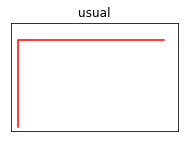

In [52]:
x = (0, 0, 1)
y = (0, 1, 1)
plt.figure(figsize=(3,2))
plot_preferencia(xvalor=x, yvalor=y, nome='usual')


### Formato U
Se a distância estiver abaixo de um limiar a alternativa A não são preferiveis com B.

No momento que atingir esse limiar a alternativa B passa a ser preferivel em relação a A

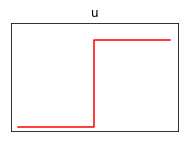

In [53]:
x = (0, 1, 1, 2)
y = (0, 0, 1, 1)
plt.figure(figsize=(3,2))
plot_preferencia(xvalor=x, yvalor=y, nome='u')


### Formato V
A preferencia vai crescendo até um limiar (de maneira linear). Se a diferença for Zero o grau de preferencia também é zero. A medida que a diferença entre as duas alternativas começarem a aumentar, há aumento da preferencia até atingir o limiar que resulta na preferencia plena em uma alterenativa.

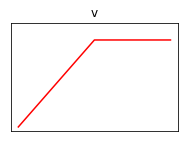

In [54]:
x = (0, 1, 2)
y = (0, 1, 1)
plt.figure(figsize=(3,2))
plot_preferencia(xvalor=x, yvalor=y, nome='v')

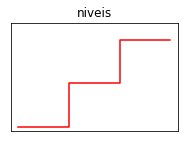

In [55]:
x = (0, 0.5, 0.5, 1, 1, 1.5)
y = (0, 0, 0.5, 0.5, 1, 1)
plt.figure(figsize=(3,2))
plot_preferencia(xvalor=x, yvalor=y, nome='niveis')

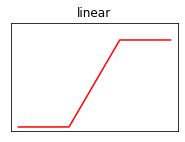

In [56]:
x = (0, 0.5, 1, 1.5)
y = (0, 0,1, 1)
plt.figure(figsize=(3,2))
plot_preferencia(xvalor=x, yvalor=y, nome='linear')

In [57]:
def tipos_de_preferencias():
    # para Gaussiana
    mu = 0
    variance = 1
    sigma = math.sqrt(variance)
    ex = np.linspace(mu - 3.4*sigma, mu + 3.4*sigma, 100)
    ex = ex[ex<0]
    ey = (stats.norm.pdf(ex, mu, sigma))*2.2    
    
    lista_x = [(0, 0, 1), (0, 1, 1, 2), (0, 1, 2), (0, 0.5, 0.5, 1, 1, 1.5), (0, 0.5, 1, 1.5), ex]
    lista_y = [(0, 1, 1), (0, 0, 1, 1), (0, 1, 1), (0, 0, 0.5, 0.5, 1, 1), (0, 0,1, 1), ey]
    nomes = ['usual', 'u', 'v', 'niveis', 'linear', 'gauss']    

    def plot_preferencia(xvalor, yvalor, nome):
        plt.plot(xvalor, yvalor, 'red')
        plt.title(nome)
        plt.yticks([1, 1.2])
        plt.yticks([]) 
        plt.xticks([0, 1.1])
        plt.xticks([])

    fig, axs = plt.subplots(2, 3, figsize=(6, 3))
    for x, y, i, k in zip(lista_x, lista_y, nomes, range(1, 7)):
        plt.subplot(2, 3, k)
        plot_preferencia(xvalor=x, yvalor=y, nome=i)
    plt.tight_layout()

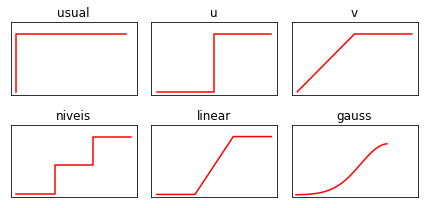

In [58]:
tipos_de_preferencias()

## Segunda parte

In [120]:
# Tabela apresentada 
d = {'Alternativas': ['A1', 'A2', 'A3', 'A4'],
     'Preço': [18000, 20500, 24700, 22800],
     'Conforto': ['Baixa', 'Médio', 'Médio', 'Alto'], 
     'Potência': [8, 5, 4, 7]
    }
# Critério
crit_max = [False, True, True]
frame = pd.DataFrame(data=d)
# Pesos: w
w = [0.5, 0.2, 0.3]

In [121]:
frame

,Alternativas,Preço,Conforto,Potência
0,A1,18000,Baixa,8
1,A2,20500,Médio,5
2,A3,24700,Médio,4
3,A4,22800,Alto,7


In [122]:
def nao_numerico(frame):
    frame.co
    

In [89]:
# Mano o que eu preciso fazer é trocar o início do código
# estou fazendo de acordo com o AHP que pegunta qual a preferencia do decisor sobre as alternativas,
# mas o Promethe não faz isso. O método é de acordo com a preferencia dos criterios "usual, u, v......"

'Preço'

In [123]:
coluna_str = []
for i, j in enumerate(frame.loc[0, frame.columns[1:]]):
    if type(j) == str:
        coluna_str.append(frame.columns[i+1])

In [124]:
coluna_str

['Conforto']

In [125]:
# Precisa definir quais são os tipos de  ordem por str 
nota = ('Alto', 'Médio','Baixa')
nota_nova = ('1', '2', '3')
frame_ex = frame.copy() 
for i, y in zip(nota, nota_nova):
    frame_ex = frame_ex.replace(i, y)

In [127]:
frame_ex

,Alternativas,Preço,Conforto,Potência
0,A1,18000,3,8
1,A2,20500,2,5
2,A3,24700,2,4
3,A4,22800,1,7


In [ ]:
replace()

In [61]:
def usual(frame, coluna, i, j, matriz, sua_matriz):
    q1 = frame.loc[i, frame.columns[0]]
    q2 = frame.loc[j, frame.columns[0]]
    if j > i:
        print(f'****Escolha entre as Alternativas no Critério {frame.columns[coluna]}****')
        print('Você prefere', '\033[91m'+f'{q1}'+'\033[0m', f'({frame.loc[i, frame.columns[coluna]]}) --> 1')
        print('Ou prefere', '\033[91m'+f'{q2}'+'\033[0m', f'({frame.loc[j, frame.columns[coluna]]}) --> 0')
        print('\033[91m'+'NÃO TEM PREFERENCIA'+'\033[0m', '--> 9')
        while True:
            try:
                resposta = int(input('Resposta: '))
                if resposta == 0:
                    matriz[i, j] = 0
                    sua_matriz.append(f'Prefiro {q1} do que {q2}')
                    break
                elif resposta == 1:
                    matriz[i, j] = 1
                    sua_matriz.append(f'Prefiro {q2} do que {q1}')
                    break
                elif resposta == 9:
                    matriz[i, j] = np.nan
                    sua_matriz.append(f'Não tenho preferencia {q2} do que {q1}')
                    break
                else:
                    print('\033[91m' + "------ERRO!!!------" + '\033[0m')
                    print('Preferência entre as Alternativas é 0 ou 1')
                    print('\033[91m' + "------ERRO!!!------" + '\033[0m')
            except ValueError:
                print('\033[91m' + "------ERRO!!!------" + '\033[0m')
                print('Preferência entre as Alternativas é 0 ou 1')
                print('\033[91m' + "------ERRO!!!------" + '\033[0m')
        print('   Loading...')
        time.sleep(1.2)  # Sleep for 1 seconds
        clear_output()  # apaga o comentário feito anteriormente
    elif j < i:
        if matriz[j, i] == 1:
            matriz[i, j] = 0
        elif matriz[j, i] == 0:
            matriz[i, j] = 1
        else:
            matriz[i, j] = np.nan
    
    return matriz, sua_matriz

In [62]:
def conjunto_matriz(frame, preferencia):
    # juntar todas as respostas
    resultado = []
    resultado_sua_matriz = []
    for k in range(1, len(frame.columns)):
        # Tamanho da Matriz de decisão
        tamanho = len(frame)

        # Matriz da comparação par a par dos critérios
        matriz = np.zeros((tamanho, tamanho), dtype=float)
        # Resultado da sua matriz 
        sua_matriz = []

        for i in range(tamanho):
            for j in range(tamanho):
                # Escolher qual a Matriz de Preferencia
                if preferencia == 'usual':
                    matriz, sua_matriz = usual(frame, k, i, j, matriz, sua_matriz)
        print('   Loading...')
        time.sleep(1.5) # Sleep for 1 seconds
        clear_output()
        # pega os valores NAN da matriz e transforma em zeros
        # faço isso devido a escolha de empate das alternativas quando colocado == "9"
        matriz = np.nan_to_num(matriz, nan=0.0)        
        resultado.append(matriz)
        resultado_sua_matriz.append(sua_matriz)
    print('Fim!')
    return resultado, resultado_sua_matriz

In [63]:
resultado, resultado_sua_matriz = conjunto_matriz(frame=frame, preferencia='usual')

****Escolha entre as Alternativas no Critério Conforto****
Você prefere A2 (Médio) --> 1
Ou prefere A4 (Alto) --> 0
NÃO TEM PREFERENCIA --> 9


KeyboardInterrupt: Interrupted by user

In [ ]:
resultado

In [ ]:
# Matriz M 
# número de vitórias
matriz = np.sum([i*k for i, k in zip(resultado,w)], axis=0)
matriz

In [ ]:
matriz_fluxo = [[np.sum(_)/(len(_)-1) for _ in matriz], [np.sum(_)/(len(_)-1) for _ in matriz.T]]
matriz_fluxo

In [ ]:
def estrutura_p(preferencia_p, matriz_fluxo, i, j):
    if (matriz_fluxo[0][i] > matriz_fluxo[0][j]) & (matriz_fluxo[1][i] < matriz_fluxo[1][j]):
        preferencia_p[i, j] = 1
    elif (matriz_fluxo[0][i] == matriz_fluxo[0][j]) & (matriz_fluxo[1][i] < matriz_fluxo[1][j]):
        preferencia_p[i, j] = 1
    elif (matriz_fluxo[0][i] > matriz_fluxo[0][j]) & (matriz_fluxo[1][i] == matriz_fluxo[1][j]):
        preferencia_p[i, j] = 1
    else:
        preferencia_p[i, j] = 0
    return preferencia_p

In [ ]:
def estrutura_i(preferencia_i, matriz_fluxo, i, j):
    if (matriz_fluxo[0][i] == matriz_fluxo[0][j]) & (matriz_fluxo[1][i] == matriz_fluxo[1][j]):
        preferencia_i[i, j] = 1
    else:
        preferencia_i[i, j] = 0
    return preferencia_i

In [ ]:
def estrutura_j(preferencia_j, matriz_fluxo, i, j):
    if (matriz_fluxo[0][i] > matriz_fluxo[0][j]) & (matriz_fluxo[1][i] > matriz_fluxo[1][j]):
        preferencia_j[i, j] = 1
    elif (matriz_fluxo[0][i] < matriz_fluxo[0][j]) & (matriz_fluxo[1][i] < matriz_fluxo[1][j]):
        preferencia_j[i, j] = 1
    else:
        preferencia_j[i, j] = 0
    return preferencia_j

In [ ]:
# criar as tabelas como apresentado na aula e depois fazer algo e depois o ordenamento e sei lá mais o que 
preferencia_p = np.zeros((len(matriz_fluxo[0]), len(matriz_fluxo[0])), dtype=float)
preferencia_i = np.zeros((len(matriz_fluxo[0]), len(matriz_fluxo[0])), dtype=float)
preferencia_j = np.zeros((len(matriz_fluxo[0]), len(matriz_fluxo[0])), dtype=float)
for i in range(len(matriz_fluxo[0])):
    for j in range(len(matriz_fluxo[0])):
        preferencia_p = estrutura_p(preferencia_p, matriz_fluxo, i, j)
        preferencia_i = estrutura_i(preferencia_i, matriz_fluxo, i, j)
        preferencia_j = estrutura_j(preferencia_j, matriz_fluxo, i, j)

In [ ]:
preferencia_p

In [ ]:
preferencia_i

In [ ]:
preferencia_j

In [ ]:
# juntar todas as respostas
resultado = []
# Tamanho da Matriz de decisão
tamanho = len(frame)

# Matriz da comparação par a par dos critérios
matriz = np.zeros((tamanho, tamanho), dtype=float)

# Matriz de preferencia
preferencia = 'usual'
sua_matriz = []

for i in range(tamanho):
    for j in range(tamanho):
        if preferencia == 'usual':
            matriz, sua_matriz = usual(frame, coluna, i, j, matriz, sua_matriz)
    
# pega os valores NAN da matriz e transforma em zeros
# faço isso devido a escolha de empate das alternativas quando colocado == "9"
matriz = np.nan_to_num(matriz, nan=0.0)

In [ ]:
    
time.sleep(8) # Sleep for 1 seconds
print('   Loading...')
clear_output()
# Matriz de Decisão
resultado = np.array(resultado)